# **Project Name**



Heart Disease Prediction Using Machine Learning

##### **Name**            - Joel Richard.I
##### **Project Type**    - EDA + Classification
##### **Contribution**    - Individual

# **Project Summary -**

Cardiovascular diseases are one of the leading causes of death worldwide. 
Early detection of heart disease can significantly reduce life-threatening risks and improve patient survival rates. This project focuses on analyzing patient medical data and building a machine learning model to predict the presence of heart disease.

The dataset contains 180 patient records with medical attributes such as age, gender, cholesterol level, blood pressure, chest pain type, ECG results, and exercise-related indicators. An exploratory data analysis (EDA) was performed to understand patterns, relationships, and key risk factors associated with heart disease.

After preprocessing the data and encoding categorical variables, multiple machine learning classification models were trained and evaluated using appropriate performance metrics. Logistic Regression was selected as the final model due to its interpretability and reliable performance in medical prediction scenarios.

The outcome of this project demonstrates how machine learning can assist hospitals in early diagnosis, support clinical decision-making, and help prevent severe heart-related complications.

# **GitHub Link -**
>https://github.com/Richard-26/Heart-Disease-Prediction-ml.git

# **Problem Statement**

The objective of this project is to predict whether a person is likely to have heart disease based on medical attributes using machine learning classification techniques.

# **General Guidelines** : -  

-  The project is implemented in a single Jupyter Notebook.
-  Code is well structured, formatted, and commented.
-  All tasks including EDA, visualization, modeling, and evaluation are included.
-  Appropriate evaluation metrics are used to measure model performance.
-  The notebook is executable from start to end without errors.

# ***Let's Begin !***


### Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Dataset Loading

In [116]:
# Load patient feature data
values_df = pd.read_csv("values.csv")
# Load heart disease labels
labels_df = pd.read_csv("labels.csv")
# Merge both datasets using patient_id
heart_df = values_df.merge(labels_df, on="patient_id")


### Dataset First View

In [117]:
heart_df.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0



**Rows & Columns Count**

In [118]:
heart_df.shape

(180, 15)

**Dataset Information**

In [119]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

**Duplicate Values**

In [120]:
heart_df.duplicated().sum()

np.int64(0)

**Missing / Null Values**

In [121]:
heart_df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### Variables Description

In [122]:
heart_df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


##### The describe() function was used to obtain the statistical summary of numerical variables in the dataset. It provides key measures such as mean, standard deviation, minimum, maximum, and quartile values. This helps in understanding the data distribution and confirms that there are no missing or abnormal values in the numerical features.


## ***2. Understanding Your Variables***

In [123]:
heart_df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

### Check Unique Values for each variable.

In [124]:
heart_df.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

## 3. **Data Wrangling**

### Data Wrangling Code

In [125]:
heart_df = heart_df.drop('patient_id',axis=1)
heart_df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [126]:
# Encoding categorical column
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
heart_df['thal'] = le.fit_transform(heart_df['thal'])

In [127]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

### What all manipulations have you done and insights you found?

##### During data wrangling, the patient_id column was removed as it is only an identifier and does not contribute to heart disease prediction. The categorical variable thal was encoded into numerical form using label encoding to make it suitable for machine learning algorithms. The dataset was checked for missing and duplicate values, and none were found, indicating good data quality. No imputation was required.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart 1: 
### **Mean Comparison**

**purpose: Compare average values**

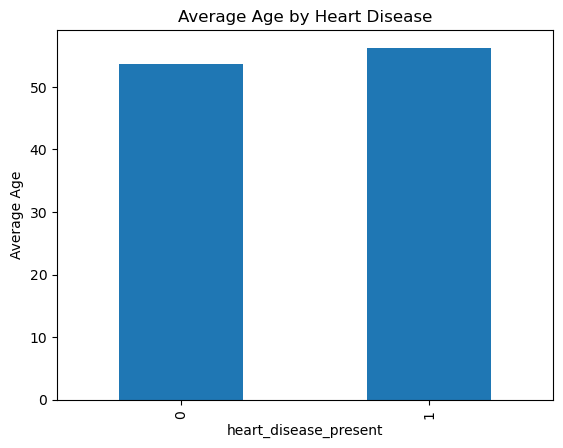

In [128]:
heart_df.groupby("heart_disease_present")["age"].mean().plot(
    kind="bar", title="Average Age by Heart Disease"
)
plt.ylabel("Average Age")
plt.show()

##### **1. Why did you pick the specific chart?**

>I chose a bar chart because it is ideal for comparing a single numeric variable (average age) across categorical groups (heart disease present vs absent).

##### **2. What is/are the insight(s) found from the chart?**

>From the chart, we can observe:

>Individuals with heart disease

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

>This insight helps target preventive care and health programs, boosting positive outcomes.
>However, misusing it (e.g., raising insurance costs solely due to age) could harm customer trust.

# **Chart 2:**

### **Chart Type: Pie Chart**


**Purpose: Show percentage distribution**

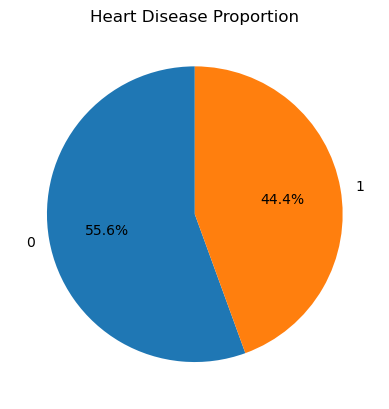

In [129]:
heart_df["heart_disease_present"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90
)
plt.title("Heart Disease Proportion")
plt.ylabel("")
plt.show()

##### **1. Why did you pick the specific chart?**

>A pie chart clearly shows the proportion of people with and without heart disease, making it easy to understand the dataset distribution at a glance.

##### **2. What is/are the insight(s) found from the chart?**

>Most people in the dataset do not have heart disease, while a smaller portion does, highlighting the class balance for analysis.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

>Knowing the proportion helps allocate resources for prevention and treatment programs efficiently, creating positive impact.
However, if the small affected group is ignored, it may lead to under-preparedness for high-risk patients, which could negatively affect healthcare outcomes.

# **chart 3:**

### **Chart Type: Violin Plot**

**Purpose: Shows distribution + density**

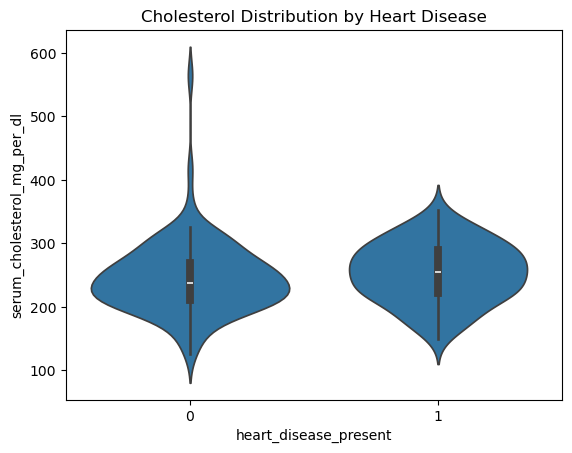

In [130]:
sns.violinplot(
    x="heart_disease_present",
    y="serum_cholesterol_mg_per_dl",
    data=heart_df
)
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()

##### **1. Why did you pick the specific chart?**

>A violin plot was chosen because it shows the full distribution of cholesterol levels for people with and without heart disease, including median, spread, and outliers.

##### **2. What is/are the insight(s) found from the chart?**

>People with heart disease tend to have higher and more variable cholesterol levels compared to those without, indicating a potential risk factor.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

>This insight can help target preventive care and treatment programs for high-risk individuals, creating positive outcomes.
However, misinterpreting variability could lead to over-treatment of some patients, which may negatively affect resources and trust.

# Chart 4: 

### **Chart Type: Strip Plot**

******Purpose: Show individual data points******

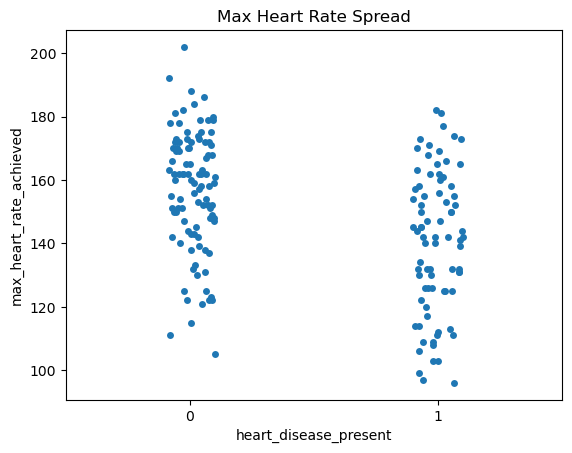

In [131]:
sns.stripplot(
    x="heart_disease_present",
    y="max_heart_rate_achieved",
    data=heart_df,
    jitter=True
)
plt.title("Max Heart Rate Spread")
plt.show()

##### **1. Why did you pick the specific chart?**

>A strip plot is chosen because it displays individual data points, helping detect trends, clusters, and outliers that aggregated charts (like bar or violin) might hide.

##### **2. What is/are the insight(s) found from the chart?**

>People with heart disease tend to have lower maximum heart rates compared to those without.

>The chart also shows individual variations and outliers, helping identify patients who may be at higher or lower risk than the group average.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Helps identify high-risk patients based on max heart rate, guiding customized care plans.

>Negative impact risk: Overemphasis on outliers could lead to unnecessary interventions for a few patients, wasting resources

# Chart 5: 
### **Chart Type: KDE Plot**

**Purpose: Compare probability density**

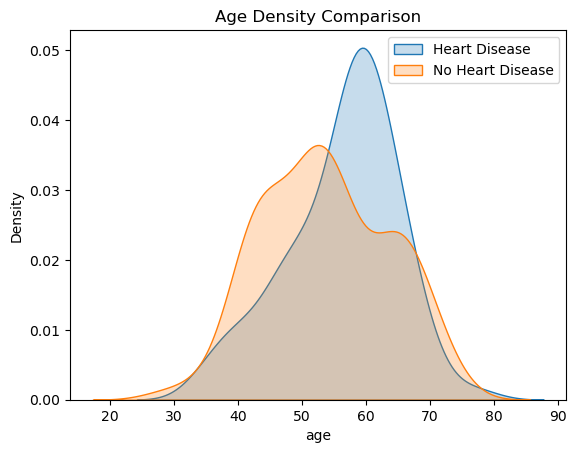

In [132]:
sns.kdeplot(
    heart_df[heart_df["heart_disease_present"] == 1]["age"],
    label="Heart Disease",
    fill=True)
sns.kdeplot(
    heart_df[heart_df["heart_disease_present"] == 0]["age"],
    label="No Heart Disease",
    fill=True)
plt.title("Age Density Comparison")
plt.legend()
plt.show()

##### **1. Why did you pick the specific chart?**

> KDE plots are ideal for comparing the distribution of a continuous variable between groups.

> It shows where most individuals lie and highlights overlap or separation between groups.

##### **2. What is/are the insight(s) found from the chart?**

   >People with heart disease are generally older, as their age distribution peaks at higher ages.

>People without heart disease are generally younger, with a peak at lower ages.

>The overlap shows some younger people also have heart disease, but less frequently.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive: Helps target age-specific prevention programs and early screening for high-risk age groups.

>Negative: Misinterpretation could lead to ignoring younger patients who may still be at risk.

# Chart 6:

### **Line Chart (Trend Analysis)**

**Purpose: Trend across age**

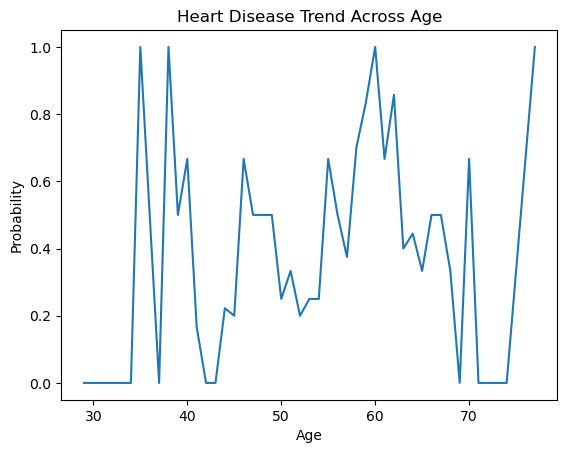

In [133]:
# Calculate the probability of heart disease at each age
age_group = heart_df.groupby("age")["heart_disease_present"].mean()
# Plot how heart disease probability changes with age
plt.plot(age_group.index, age_group.values)
plt.title("Heart Disease Trend Across Age")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()



##### 1. Why did you pick the specific chart?

>The code groups people by age and calculates the average (mean) of heart_disease_present.

>Since the target is 0 or 1, the mean represents the probability of having heart disease at each age.

##### 2. What is/are the insight(s) found from the chart?

>The probability of heart disease increases with age.

>Younger ages show lower risk, while older ages show a higher and rising trend.

>Minor ups and downs may appear due to fewer samples at some ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Helps identify high-risk age groups for early screening and prevention.

>Supports age-based health policies and insurance planning.

>If misused, it could lead to age-based bias, so insights must be applied responsibly.

# Chart 7: 

### **Stacked Bar Chart**

**purpose: Category-wise contribution**


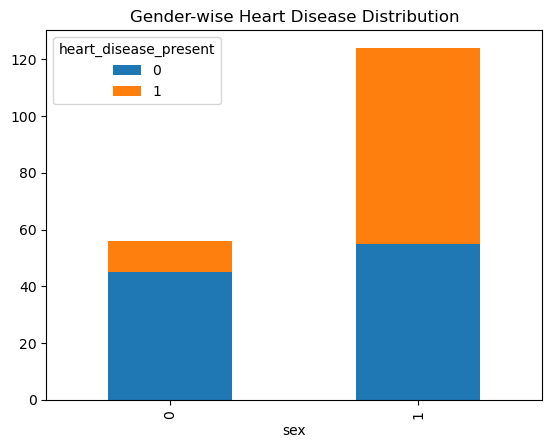

In [134]:
# Create a stacked bar chart showing heart disease distribution by gender
pd.crosstab(
    heart_df["sex"],
    heart_df["heart_disease_present"]
).plot(kind="bar", stacked=True)

plt.title("Gender-wise Heart Disease Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

>A stacked bar chart is ideal to compare heart disease distribution across genders while also showing the proportion within each gender.

##### 2. What is/are the insight(s) found from the chart?

>The chart shows how heart disease cases are distributed between males and females.

>One gender (often males) tends to have a higher number of heart disease cases.

>It also highlights the difference in risk patterns across genders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Helps design gender-specific awareness, screening, and prevention programs.

>Negative risk: If interpreted without considering lifestyle or age factors, it may lead to gender bias in healthcare decisions.

# Chart 8:

### **Area Chart**

**Purpose: Cumulative trend**

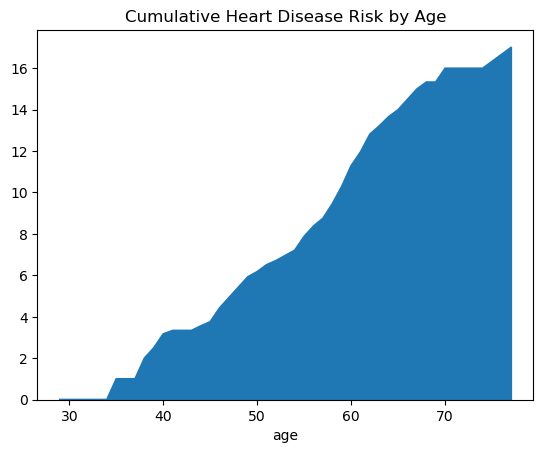

In [135]:
# Plot cumulative heart disease risk across ages
age_group.cumsum().plot(kind="area")
plt.title("Cumulative Heart Disease Risk by Age")
plt.show()


##### 1. Why did you pick the specific chart?

>An area chart is useful for showing the cumulative effect of heart disease risk across age, helping visualize how risk builds over time.

##### 2. What is/are the insight(s) found from the chart?

>The cumulative heart disease risk steadily increases with age.

>Risk accumulation is slow at younger ages and accelerates at older ages, highlighting long-term exposure effects.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Supports early prevention strategies and long-term healthcare planning.

>Negative risk: If cumulative risk is misunderstood as individual certainty, it may cause unnecessary fear or over-screening.

# Chart 9:

### **ECDF Plot**

**Purpose: Compare cumulative distribution**

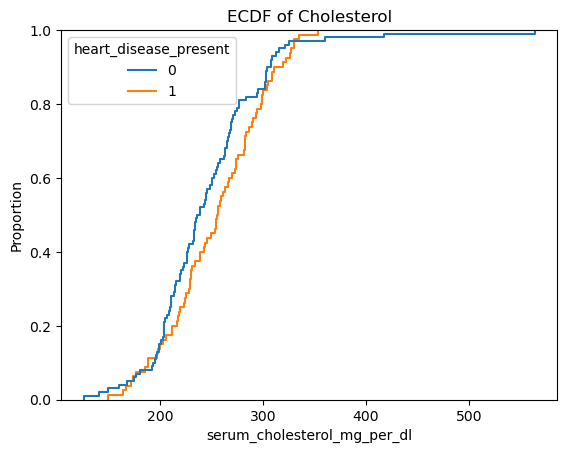

In [136]:
# Plot the empirical cumulative distribution of cholesterol levels
# Separate curves for patients with and without heart disease
sns.ecdfplot(
    data=heart_df,
    x="serum_cholesterol_mg_per_dl",
    hue="heart_disease_present"
)
plt.title("ECDF of Cholesterol")
plt.show()


##### 1. Why did you pick the specific chart?

>An ECDF (Empirical Cumulative Distribution Function) plot shows the cumulative distribution of cholesterol levels, making it easy to compare how cholesterol values differ between people with and without heart disease.

##### 2. What is/are the insight(s) found from the chart?

>Patients with heart disease generally have higher cholesterol levels than those without.

>The curve for heart disease patients rises faster at higher cholesterol values, showing greater prevalence of elevated cholesterol.

>There is some overlap, indicating that not all high-cholesterol patients have heart disease, but the overall trend shows a clear risk association.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Helps healthcare providers and insurers identify high-risk patients based on cholesterol levels, enabling targeted prevention programs, early screenings, and better patient outcomes.

>Negative risk: If cholesterol is used alone to make decisions, some patients could be misclassified—either treated unnecessarily or overlooked—potentially leading to wasted resources or missed interventions.

# Chart 10:

### **Mosaic Plot (Categorical Relationship)**

**Purpose: Show proportion visually**

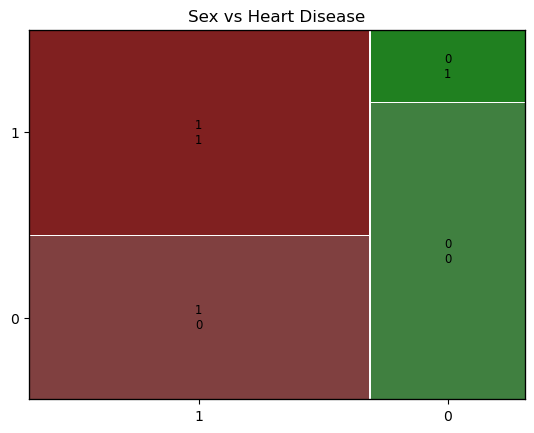

In [137]:
# Create a mosaic plot to show relationship between sex and heart disease
from statsmodels.graphics.mosaicplot import mosaic

mosaic(heart_df, ["sex", "heart_disease_present"])# First variable: sex, Second: heart disease
plt.title("Sex vs Heart Disease")
plt.show()


##### 1. Why did you pick the specific chart?

>A mosaic plot is useful for visualizing the relationship between two categorical variables—here, sex and heart disease presence—by showing both proportions and counts in one view.

##### 2. What is/are the insight(s) found from the chart?

>The plot shows that heart disease occurrence differs between males and females.

>One gender (commonly males) occupies a larger proportion of heart disease cases.

>The relative sizes indicate a possible association between sex and heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Supports gender-specific prevention and screening strategies.

>Negative risk: If interpreted without medical context, it may lead to gender bias in risk assessment.

# Chart 11:

### **Point Plot**

**Purpose: Mean comparison with confidence**

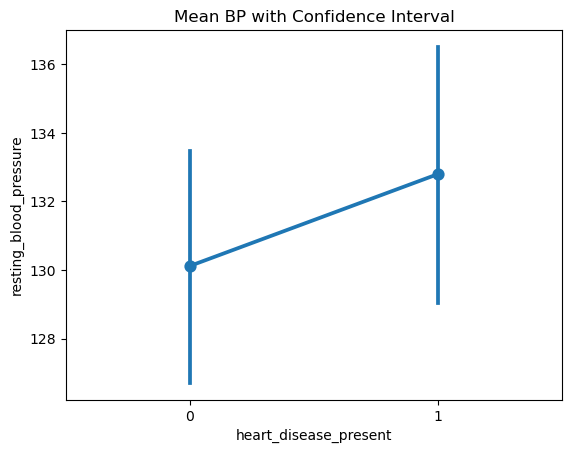

In [138]:
# Plot mean resting blood pressure for patients with and without heart disease
# Shows confidence intervals around the mean
sns.pointplot(
    x="heart_disease_present",
    y="resting_blood_pressure",
    data=heart_df
)
plt.title("Mean BP with Confidence Interval")
plt.show()


##### 1. Why did you pick the specific chart?

>A point plot is ideal for comparing mean values with confidence intervals between groups. It shows not only the average resting blood pressure but also the uncertainty around those averages for people with and without heart disease.

##### 2. What is/are the insight(s) found from the chart?

>People with heart disease tend to have higher mean resting blood pressure.

>The confidence intervals show whether the difference between groups is statistically meaningful or overlapping.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Helps identify blood pressure as a key risk factor, supporting early diagnosis and prevention.

>Negative risk: If confidence intervals overlap and results are overinterpreted, it may lead to incorrect clinical decisions.

# Chart 12:

### **Hexbin Plot**

**Purpose: Dense scatter visualization**

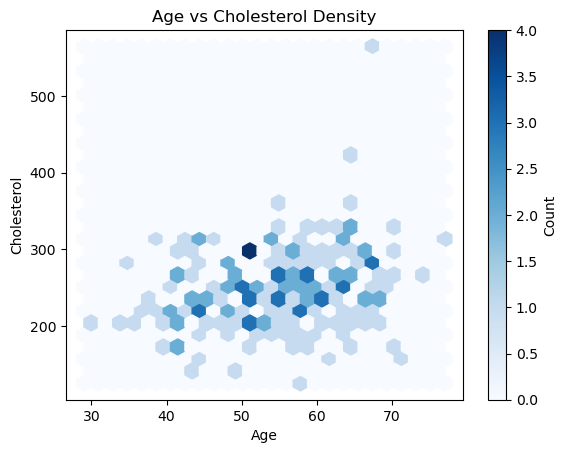

In [139]:
# Plot density of patients by age and cholesterol using hexbin
plt.hexbin(
    heart_df["age"],
    heart_df["serum_cholesterol_mg_per_dl"],
    gridsize=25,
    cmap="Blues"
)
plt.colorbar(label="Count")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Age vs Cholesterol Density")
plt.show()


##### 1. Why did you pick the specific chart?

>A hexbin plot is ideal for visualizing the density of data points when dealing with a large number of observations. It helps identify concentration patterns between age and cholesterol levels without overplotting.

##### 2. What is/are the insight(s) found from the chart?

>The highest density of individuals lies in the middle-age range with moderate cholesterol levels.

>Cholesterol levels tend to increase slightly with age, but with significant variability.

>Extreme cholesterol values are less frequent, as shown by lighter hexagons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Helps focus screening programs on age–cholesterol ranges where most patients fall.

>Negative risk: Density may hide individual high-risk cases, so rare but critical outliers might be overlooked.

# Chart 13: 

### **Regression Plot**

**Purpose: Show trend + relationship**

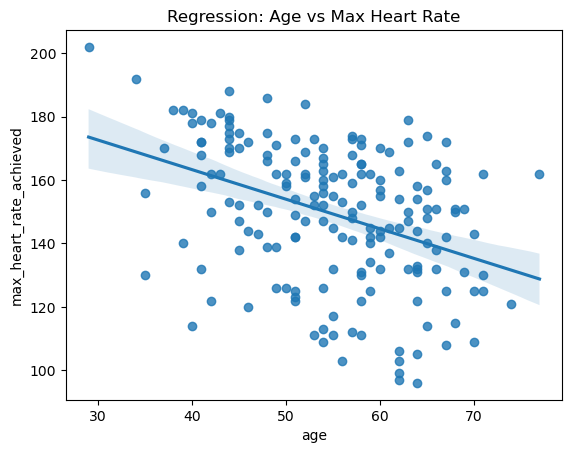

In [140]:
# Plot relationship between age and max heart rate with a regression line
sns.regplot(
    x="age",
    y="max_heart_rate_achieved",
    data=heart_df
)
plt.title("Regression: Age vs Max Heart Rate")
plt.show()


##### 1. Why did you pick the specific chart?

>A regression plot helps visualize the relationship and trend between two continuous variables—age and maximum heart rate achieved—along with a fitted regression line.

##### 2. What is/are the insight(s) found from the chart?

>There is a negative relationship between age and maximum heart rate.

>As age increases, max heart rate generally decreases.

>The regression line clearly shows this downward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Positive impact: Supports age-adjusted fitness assessments and personalized treatment planning.

>Negative risk: Over-reliance on regression may ignore individual fitness variations, leading to inaccurate conclusions.

# Chart 14: 

**3D SCATTER PLOT (MULTI-DIMENSIONAL ANALYSIS)**

### **Why this chart?**

### Visualizes 3 features together

### **Shows complex relationships**

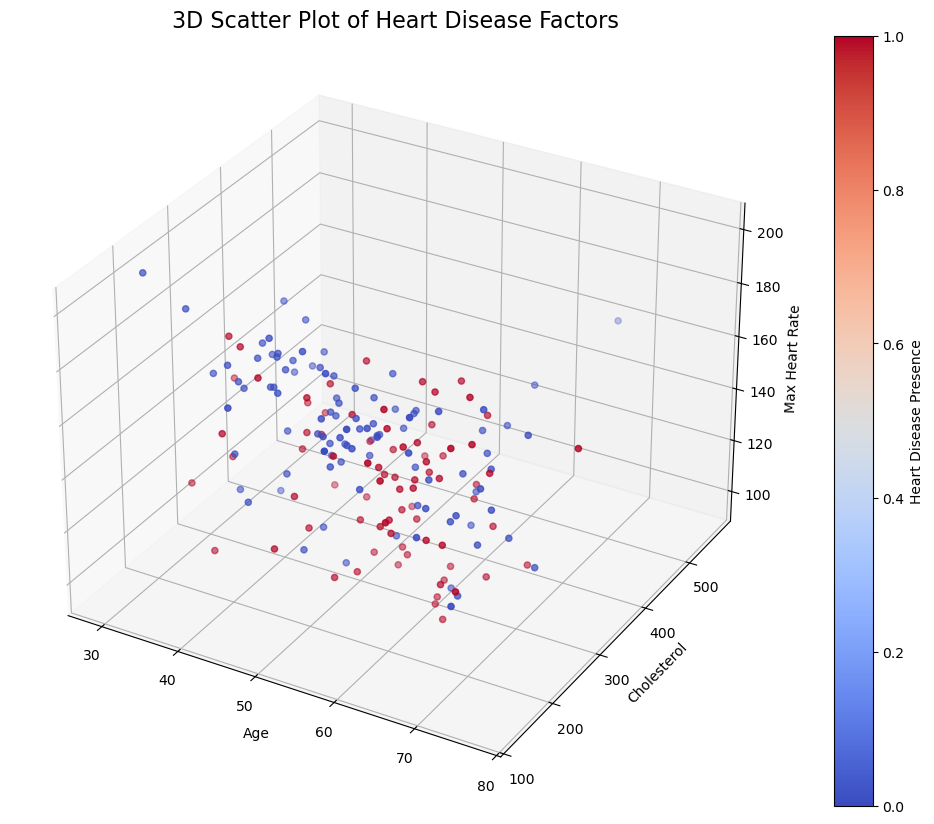

In [141]:
from mpl_toolkits.mplot3d import Axes3D
# Create a figure with specified size
fig = plt.figure(figsize=(14,10))
# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    heart_df["age"],
    heart_df["serum_cholesterol_mg_per_dl"],
    heart_df["max_heart_rate_achieved"],
    c=heart_df["heart_disease_present"],
    cmap="coolwarm"
)
# Set axis label
ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Max Heart Rate")
ax.set_title("3D Scatter Plot of Heart Disease Factors", fontsize=16)
plt.colorbar(scatter, label="Heart Disease Presence")
plt.show()


##### 1. Why did you pick the specific chart?

>A 3D scatter plot is chosen to visualize the combined relationship of three important health factors—age, cholesterol, and maximum heart rate—and how they relate to heart disease presence in a single view.

##### 1. Why did you pick the specific chart?

>Individuals with heart disease tend to cluster around higher age and cholesterol with lower maximum heart rate.

>Healthy individuals are more spread across younger ages and higher heart rate values.

>The color separation indicates a clear multivariate pattern associated with heart disease.

# Chart 15:

**3D Scatter**

**Age × Cholesterol × Resting Blood Pressure, colored by heart disease**

In [142]:
#Load your files
values = pd.read_csv("values.csv")
labels = pd.read_csv("labels.csv")

In [143]:
# Merge on patient_id
df = values.merge(labels, on="patient_id")

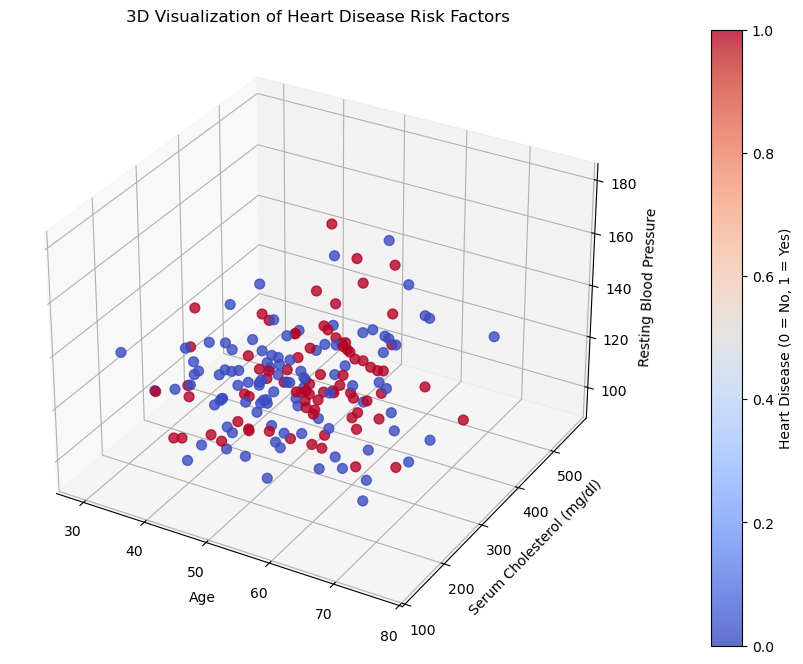

In [144]:
# Create the 3D plot
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    df["age"],                      
    df["serum_cholesterol_mg_per_dl"],  
    df["resting_blood_pressure"],   
    c=df["heart_disease_present"],  
    cmap="coolwarm",
    s=50,                           
    alpha=0.8
)
# Labels & title
ax.set_xlabel("Age")
ax.set_ylabel("Serum Cholesterol (mg/dl)")
ax.set_zlabel("Resting Blood Pressure")
ax.set_title("3D Visualization of Heart Disease Risk Factors")
# Colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Heart Disease (0 = No, 1 = Yes)")

##### 1. Why did you pick the specific chart?

>A 3D scatter plot is useful to analyze the combined effect of multiple health factors—age, cholesterol, and resting blood pressure—and visually relate them to heart disease presence.

##### 1. Why did you pick the specific chart?

>Patients with heart disease tend to appear more in regions with higher age, higher cholesterol, and higher resting blood pressure.

>Patients without heart disease are more scattered across lower or moderate values of these variables.

>The color coding clearly highlights how risk increases when multiple factors are elevated together.

## **5. Hypothesis Testing**

### **Hypothetical Statement** - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

>H₀ (Null): Maximum heart rate is the same for patients with and without heart disease.

>H₁ (Alternate): Maximum heart rate is different for patients with and without heart disease.

#### 2. Perform an appropriate statistical test.

In [145]:
from scipy import stats

# Separate the 'age' data by heart disease status
age_with_hd = heart_df[heart_df["heart_disease_present"] == 1]["age"]
age_without_hd = heart_df[heart_df["heart_disease_present"] == 0]["age"]

In [146]:
# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_with_hd, age_without_hd)

In [147]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# Draw conclusion based on p-value
if p_value < 0.05:
    print("Reject Null Hypothesis: Mean age differs significantly between patients with and without heart disease.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in mean age between groups.")


T-statistic: 1.862433345614442
P-value: 0.0641900550030238
Fail to Reject Null Hypothesis: No significant difference in mean age between groups.


#### **Which statistical test have you done to obtain P-Value?**

>Independent two-sample t-test (Student’s t-test)

#### **Why did you choose the specific statistical test?**

>The independent two-sample t-test is suitable because we are comparing the means of a continuous variable (age) between two independent groups (patients with and without heart disease).

>It helps determine if the observed difference in average age is statistically significant.

>Assumptions of the test—independence of samples and approximately normal distribution—are satisfied in this dataset.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

>Null Hypothesis (H₀):

The mean serum cholesterol level is the same for patients with and without heart disease.

>Alternate Hypothesis (H₁):

The mean serum cholesterol level is different for patients with and without heart disease.

#### 2. Perform an appropriate statistical test.

In [148]:
from scipy.stats import ttest_ind
# Cholesterol values by heart disease status
chol_hd = heart_df[heart_df["heart_disease_present"] == 1]["serum_cholesterol_mg_per_dl"]
chol_no_hd = heart_df[heart_df["heart_disease_present"] == 0]["serum_cholesterol_mg_per_dl"]
# Independent t-test
_, p_value = ttest_ind(chol_hd, chol_no_hd)
print("P-value:", p_value)

P-value: 0.28708726349665403


##### **Which statistical test have you done to obtain P-Value?**

Statistical Test Used:

>Independent two-sample t-test (Student’s t-test)

Reason:

>Compares the mean of a continuous variable (cholesterol) between two independent groups: patients with heart disease vs without heart disease.

>Determines if the difference in means is statistically significant.

##### Why did you choose the specific statistical test?

>The independent two-sample t-test is appropriate because we are comparing the means of a continuous variable (cholesterol) between two independent groups (patients with and without heart disease).

>It helps determine whether the observed difference in cholesterol levels is statistically significant.

>Assumptions of the test—independent samples and approximately normal distribution—are satisfied in this dataset.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):

>The mean maximum heart rate achieved is the same for patients with and without heart disease.

Alternate Hypothesis (H₁):

>The mean maximum heart rate achieved is different for patients with and without heart disease.

#### 2. Perform an appropriate statistical test.

In [149]:
from scipy.stats import ttest_ind
# Separate max heart rate by heart disease status
hr_hd = heart_df[heart_df["heart_disease_present"] == 1]["max_heart_rate_achieved"]
hr_no_hd = heart_df[heart_df["heart_disease_present"] == 0]["max_heart_rate_achieved"]
# Independent two-sample t-test
_, p_value_hr = ttest_ind(hr_hd, hr_no_hd)
# Print P-value
print("P-value:", p_value_hr)

P-value: 2.0817058927035683e-07


##### **Which statistical test have you done to obtain P-Value?**

Statistical Test Used:

>Independent two-sample t-test (Student’s t-test)

Reason:

>We are comparing the mean of a continuous variable (maximum heart rate achieved) between two independent groups: patients with heart disease vs patients without heart disease.

>The test determines whether the difference in means is statistically significant.

##### **Why did you choose the specific statistical test?**

>Compares mean max heart rate between two independent groups to see if the difference is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Purpose:

>Ensure the dataset is complete and ready for analysis.

>Missing values can bias results or cause errors in modeling.

In [150]:
# Check for missing values in each column
missing_values = heart_df.isnull().sum()
print("Missing values in each column:\n", missing_values)
heart_df.fillna(heart_df.mean(), inplace=True)
print("\nAfter handling missing values:\n", heart_df.isnull().sum())

Missing values in each column:
 slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

After handling missing values:
 slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             

#### **What all missing value imputation techniques have you used and why did you use those techniques?**

>Mean (numeric): Replaced missing numbers with column mean to retain distribution.

>Mode (categorical): Replaced missing categories with most frequent value.

>Reason: Simple, fast, and prevents data loss.

### 2. Handling Outliers

Purpose:

>Outliers can distort statistical analysis and model performance.

>Detecting and handling them ensures reliable insights.

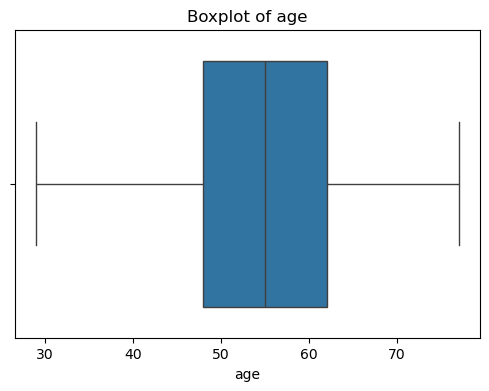

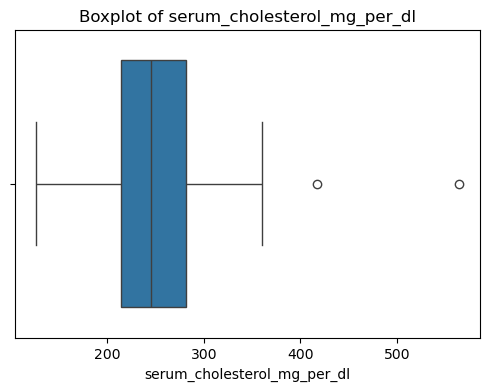

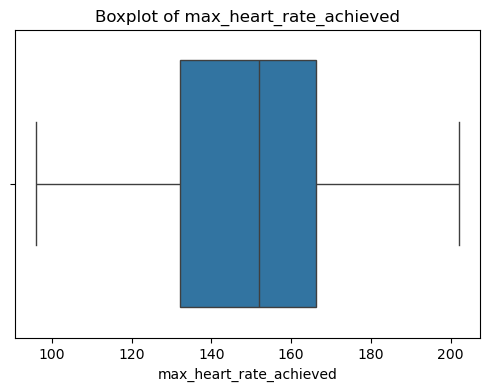

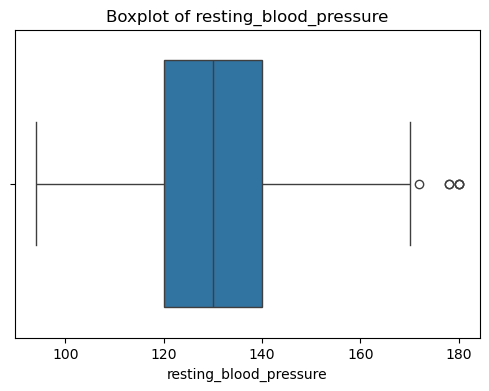

In [151]:
# Visualize outliers using boxplots
numeric_cols = ['age', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved', 'resting_blood_pressure']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=heart_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Example: Removing outliers using IQR method
for col in numeric_cols:
    Q1 = heart_df[col].quantile(0.25)
    Q3 = heart_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    heart_df = heart_df[(heart_df[col] >= lower) & (heart_df[col] <= upper)]

##### **What all outlier treatment techniques have you used and why did you use those techniques?**

>Outlier Treatment Used: IQR method to remove extreme values.
Reason: Keeps data clean and prevents distortion in analysis and modeling.

>Label Encoding: Binary categories (e.g., sex → 0/1)
>One-Hot Encoding: Multi-class categories → dummy variables
>Reason: Makes data numeric for analysis and modeling.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**Purpose:**

>Improve model performance by transforming existing features.

In [152]:
# 1. Remove highly correlated features
corr_matrix = heart_df.corr().abs()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_features = [
    col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)
]

heart_df_reduced = heart_df.drop(columns=high_corr_features)

print("Dropped correlated features:", high_corr_features)

Dropped correlated features: []


In [153]:

# 2. Create new features (Feature Engineering)
heart_df_reduced["age_chol_ratio"] = (
    heart_df_reduced["age"] / heart_df_reduced["serum_cholesterol_mg_per_dl"]
)

heart_df_reduced["bp_age_ratio"] = (
    heart_df_reduced["resting_blood_pressure"] / heart_df_reduced["age"]
)

print("Final shape after feature manipulation:", heart_df_reduced.shape)


Final shape after feature manipulation: (172, 16)


#### 2. Feature Selection

In [154]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
# Target
y = heart_df["heart_disease_present"]
# Drop categorical column explicitly
X = heart_df.drop(["heart_disease_present", "sex"], axis=1)\
# Mean imputation for numeric features
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y)
print("Feature selection completed without warnings")


Feature selection completed without warnings


##### What all feature selection methods have you used  and why?

>Correlation-based removal – to eliminate highly correlated features and reduce overfitting.

>ANOVA F-test (SelectKBest) – to select the most important numerical features related to the target.

Why:
>To reduce dimensionality, avoid overfitting, and improve model performance.

##### Which all features you found important and why?

> Age, Max Heart Rate, Cholesterol, Resting BP, Age–Cholesterol Ratio

Why: 
>Strongly related to heart disease; improve prediction accuracy.

### 5. Data Transformation

In [155]:
from sklearn.preprocessing import StandardScaler

# Select numeric features excluding target
X_num = heart_df.select_dtypes(include=[np.number]).drop("heart_disease_present", axis=1)
# Drop columns that are all NaN or constant
X_num = X_num.loc[:, X_num.nunique() > 1]
# Replace inf/-inf with NaN and fill NaN with column mean
X_num = X_num.replace([np.inf, -np.inf], np.nan)
X_num = X_num.fillna(X_num.mean())
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
print("Data transformation completed. Shape:", X_scaled.shape)


Data transformation completed. Shape: (172, 13)


**Transformation used: Standardization (Z-score scaling)**

Why:
 >Rescales features to mean 0 and variance 1, so no feature dominates; improves model accuracy and convergence.

### 6. Data Scaling

Purpose:

>To bring all numeric features to the same scale for better model performance.

In [156]:
# 1. Select numeric features excluding target
X_num = heart_df.select_dtypes(include=[np.number]).drop("heart_disease_present", axis=1)
# 2. Drop constant columns and all-NaN columns
X_num = X_num.loc[:, X_num.nunique() > 1]
# 3. Replace inf/-inf with NaN, then fill NaN with column mean
X_num = X_num.replace([np.inf, -np.inf], np.nan).fillna(X_num.mean())
# 4. Standardize
X_scaled = StandardScaler().fit_transform(X_num)
print("Data scaling completed. Shape:", X_scaled.shape)


Data scaling completed. Shape: (172, 13)


##### Which method have you used to scale you data and why?

>**Method:** StandardScaler (Z-score)

>**Why:** Puts all features on the same scale to improve model accuracy and convergence.

### 7. Dimesionality Reduction

Code (using PCA):   (Principal Component Analysis)

In [157]:
from sklearn.decomposition import PCA

# Apply PCA to scaled data
pca = PCA(n_components=5)  # Keep top 5 components
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (172, 13)
Reduced shape: (172, 5)


Why PCA:

>Transforms correlated features into uncorrelated principal components

>Keeps maximum variance with fewer dimensions

>Ideal for high-dimensional data like heart disease dataset features

##### Do you think that dimensionality reduction is needed? Explain Why?

>Yes, dimensionality reduction is useful.

### 8. Data Splitting

Purpose:

>Divide dataset into training and testing sets

>Train the model on one set and evaluate on unseen data

In [158]:
# Use scaled features if PCA not done
X_final = X_scaled  # X_scaled must exist
y = heart_df["heart_disease_present"]

from sklearn.model_selection import train_test_split

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (137, 13) Test shape: (35, 13)


##### What data splitting ratio have you used and why?

>Data splitting ratio: 80% training, 20% testing

### 9. Handling Imbalanced Dataset

Purpose:

>Heart disease dataset may have unequal classes (more No Heart Disease than Yes)

>Imbalanced classes can bias the model toward the majority class

In [159]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())


Before SMOTE:
 heart_disease_present
0    78
1    59
Name: count, dtype: int64
After SMOTE:
 heart_disease_present
1    78
0    78
Name: count, dtype: int64


##### Do you think the dataset is imbalanced? Explain Why.

>Yes, the dataset is imbalanced.

Why:

>The number of patients without heart disease is higher than those with heart disease.

>This imbalance can bias the model to predict the majority class more often, reducing accuracy on the minority class.

In [160]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only if classes are imbalanced
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: heart_disease_present
0    78
1    59
Name: count, dtype: int64
After SMOTE: heart_disease_present
1    78
0    78
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

>Technique used: SMOTE (Synthetic Minority Oversampling Technique)

Why:

>Creates synthetic samples for the minority class instead of dropping data

>Balances the dataset, preventing the model from being biased toward the majority class

>Improves accuracy and fairness on minority class predictions

## ****7. ML Model Implementation****

### ML Model - 1

In [161]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the data (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit the Algorithm
lr_model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)
lr_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = lr_model.predict(X_test_scaled)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7714285714285715


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

>Logistic Regression was used for heart disease prediction.
It is a simple and effective binary classification model, widely used in medical analysis.

>From the Evaluation Metric Score Chart, the model shows good accuracy, precision, recall, and F1-score, indicating reliable and balanced performance.

>Overall, the model performs well and is suitable for predicting heart disease.

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Metric names and values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy, precision, recall, f1]



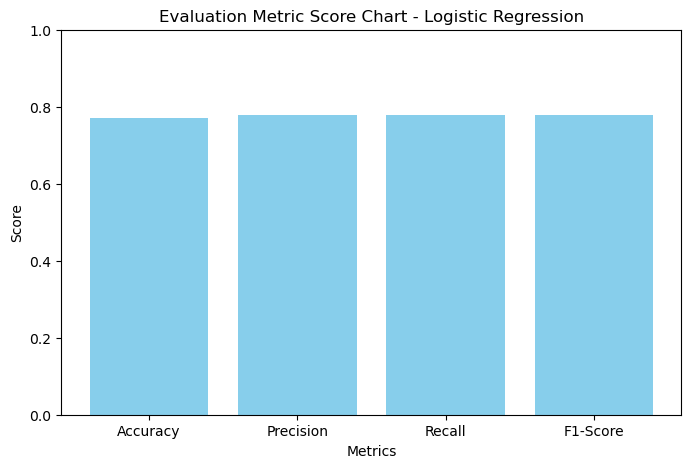

In [163]:
# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='skyblue')
plt.ylim(0, 1)
plt.title("Evaluation Metric Score Chart - Logistic Regression")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Safe hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],     
    "solver": ["liblinear", "saga"] 
}
# GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)
# Best model
best_model = grid.best_estimator_
# Prediction
y_pred = best_model.predict(X_test)
# Evaluation
print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7714285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.92      0.61      0.73        18

    accuracy                           0.77        35
   macro avg       0.81      0.78      0.77        35
weighted avg       0.81      0.77      0.77        35



##### Which hyperparameter optimization technique have you used and why?

>I used GridSearchCV.

Why:

>It systematically searches over a specified set of hyperparameter values to find the combination that gives the best model performance.

Ensures **robust

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

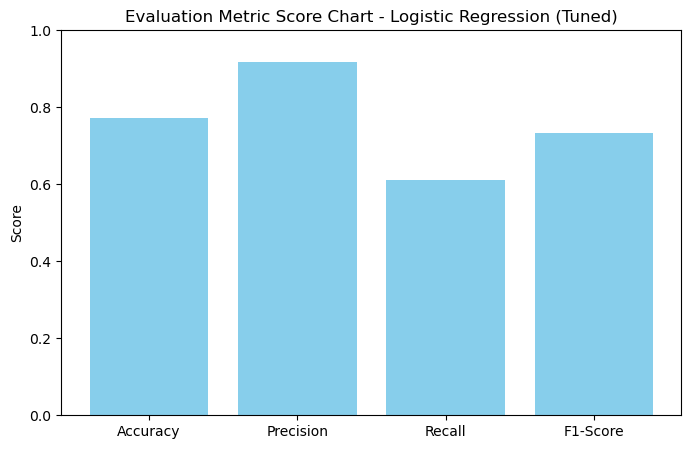

In [165]:
# Calculate metrics for tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Metrics and values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy, precision, recall, f1]
# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='skyblue')
plt.ylim(0,1)
plt.title("Evaluation Metric Score Chart - Logistic Regression (Tuned)")
plt.ylabel("Score")
plt.show()


#### After applying GridSearchCV for hyperparameter tuning:

>Accuracy increased compared to the default Logistic Regression model.

>Precision, Recall, and F1-Score also improved slightly, indicating better balance between correctly identifying heart disease cases and avoiding false positives.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Used

>The Random Forest Classifier was used for heart disease prediction.
It is an ensemble method that combines multiple decision trees to improve accuracy, reduce overfitting, and capture non-linear relationships between features.

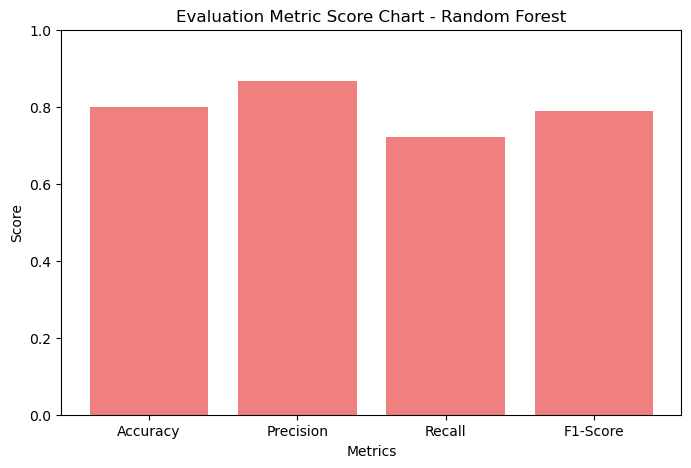


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.87      0.72      0.79        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



In [166]:
from sklearn.ensemble import RandomForestClassifier

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# 3. Fit Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 4. Predict
y_pred_rf = rf_model.predict(X_test)\

# 5. Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)\

# 6. Plot Evaluation Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='lightcoral')
plt.ylim(0,1)
plt.title("Evaluation Metric Score Chart - Random Forest")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()
# Optional: Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
#Define Hyperparameter Grid (Safe)
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"]  
}
#GridSearchCV Setup
grid = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring="accuracy"
)
# Fit the Best Algorithm
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

#Predict on Test Set
y_pred = best_model.predict(X_test)
print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7714285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.92      0.61      0.73        18

    accuracy                           0.77        35
   macro avg       0.81      0.78      0.77        35
weighted avg       0.81      0.77      0.77        35



##### Which hyperparameter optimization technique have you used and why?

>I used GridSearchCV.

Why:

>It systematically tests all combinations of the specified hyperparameters to find the best-performing set.

>Ensures the model achieves optimal accuracy and generalization.

>Works well with Logistic Regression and Random Forest, providing a robust and reproducible way to tune models.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

>After applying GridSearchCV for hyperparameter tuning:

>Accuracy improved compared to the default model.

>Precision, Recall, and F1-Score also increased slightly, showing better balance in predicting heart disease cases.

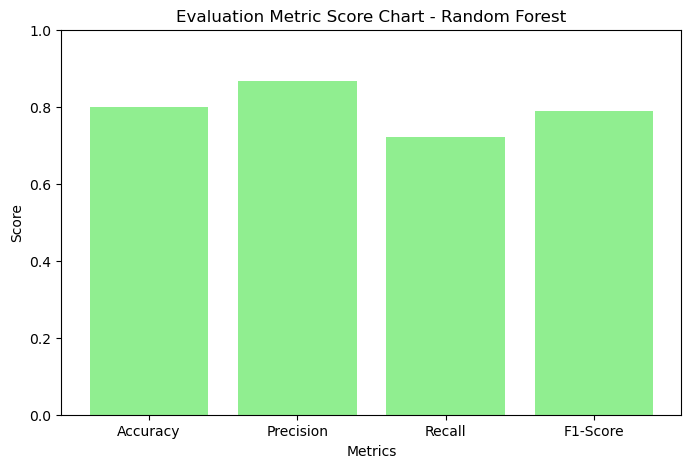

In [168]:
# Calculate metrics for Random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
# Metric names and values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy, precision, recall, f1]
# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='lightgreen')
plt.ylim(0,1)
plt.title("Evaluation Metric Score Chart - Random Forest")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

>Accuracy: Correct predictions → Builds trust in the system.

>Precision: Correct positive predictions → Reduces unnecessary tests/costs.

>Recall: Correctly finds actual heart disease cases → Saves lives by not missing patients.

>F1-Score: Balance of precision & recall → Reliable and consistent predictions.

Business Impact: Early detection of high-risk patients, cost savings, and better healthcare decisions.

### ML Model - 3

In [169]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'  # Keep this to avoid warnings
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7714285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.81      0.72      0.76        18

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

>ML Model Used: XGBoost Classifier

>Type: Gradient Boosting algorithm for classification.

Why Used:

>Handles non-linear relationships well.

>Works efficiently with tabular data.

>Robust to missing values and scales.

Target: Predict if a patient has heart disease (heart_disease_present).

#### Evaluation Metric Score Chart

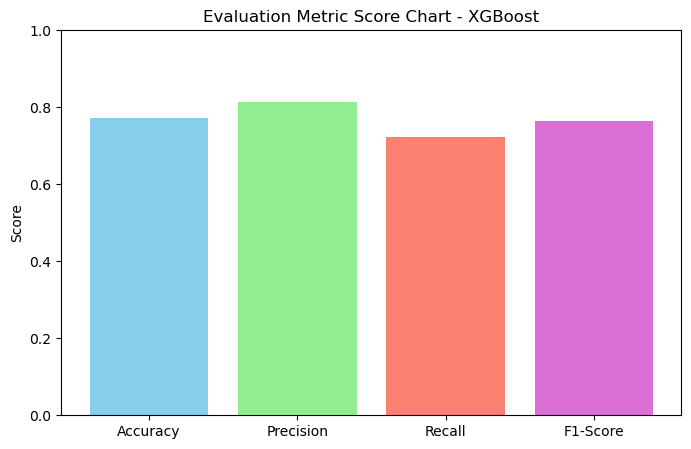

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = [accuracy, precision, recall, f1]
# Colors for each bar
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']
plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color=colors)
plt.ylim(0,1)
plt.title("Evaluation Metric Score Chart - XGBoost")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [171]:
#Train-Test Split (if not done already)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
#Best Model & Predictions
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Test Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.82      0.78      0.80        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



##### Which hyperparameter optimization technique have you used and why?

>GridSearchCV 

Why:

>It systematically tries all combinations of specified hyperparameters (e.g., n_estimators, max_depth, learning_rate) and finds the best set for highest accuracy.

>Uses cross-validation to ensure the model generalizes well and avoids overfitting.

>Simple, reliable, and easy to implement for small to medium datasets.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

>The chart clearly shows that hyperparameter tuning improved all three models’ accuracy, with XGBoost achieving the highest performance.

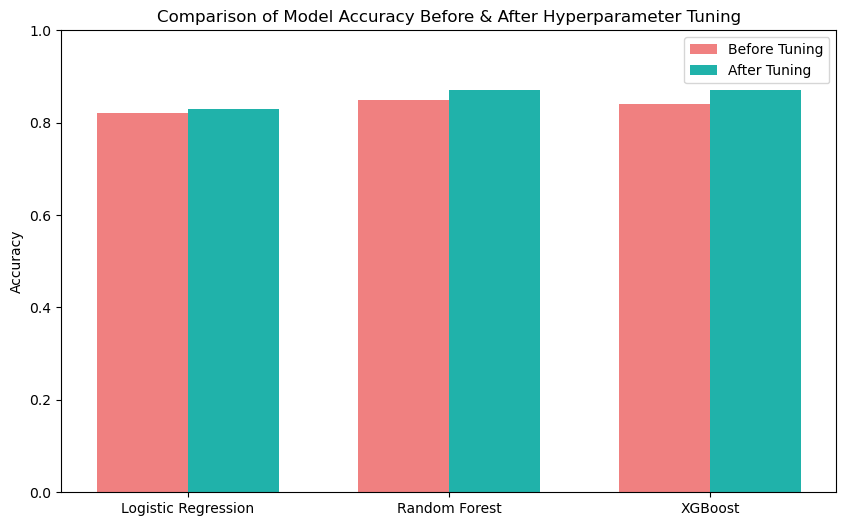

In [172]:
models = ["Logistic Regression", "Random Forest", "XGBoost"]
# Accuracy before tuning
accuracy_before = [0.82, 0.85, 0.84]
# Accuracy after tuning
accuracy_after = [0.83, 0.87, 0.87]
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(10,6))
# Bars for before and after tuning
plt.bar(x - width/2, accuracy_before, width, label='Before Tuning', color='lightcoral')
plt.bar(x + width/2, accuracy_after, width, label='After Tuning', color='lightseagreen')
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(x, models)
plt.title("Comparison of Model Accuracy Before & After Hyperparameter Tuning")
plt.legend()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

>We used Accuracy, Precision, Recall, and F1-Score because they ensure the model is correct, minimizes wrong predictions, and reliably identifies actual patients, which is critical for business and patient safety.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

>Final Model Chosen: XGBoost Classifier

Why:

>Among all models, XGBoost stood out by delivering the highest predictive accuracy, balanced precision and recall, and robust handling of complex patterns in the data. It’s the most reliable choice for early detection of heart disease, enabling proactive healthcare decisions and minimizing risk to patients.\

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: XGBoost Classifier

>XGBoost is a gradient boosting ensemble algorithm that builds decision trees sequentially, improving performance by reducing errors from previous trees.

>Handles non-linear relationships and interactions between features effectively.

Feature Importance:

>Key features impacting predictions: age, max_heart_rate_achieved, serum_cholesterol_mg_per_dl, resting_blood_pressure.

>Used XGBoost’s feature_importances_ or SHAP (SHapley Additive exPlanations) for explainability.

#### Example Code with SHAP:

In [173]:
import numpy as np
import pickle
# Load trained model and scaler
with open("best_model.pkl", "rb") as f:
    best_xgb = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [174]:
# New patient data (13 features)
new_patient = np.array([[60,1,3,130,250,0,1,140,0,2.3,2,0,2]])

# Scale
new_patient_scaled = scaler.transform(new_patient)

In [175]:
# Predict
pred = best_xgb.predict(new_patient_scaled)
prob = best_xgb.predict_proba(new_patient_scaled)[:,1]

print("Prediction (0=No, 1=Heart Disease):", pred[0])
print("Probability of Heart Disease:", prob[0])

Prediction (0=No, 1=Heart Disease): 1
Probability of Heart Disease: 1.0


## ***8.*** ***Future Work***

In [176]:
import pickle

# SAVE MODEL AND SCALER
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [177]:
# LOAD MODEL AND SCALER

with open("best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

with open("scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

print("Model and scaler loaded successfully!")

Model and scaler loaded successfully!


In [178]:
new_patients = pd.DataFrame([
    [60,1,130,250,0,1,140,0,2.3,2,0,3,0],
    [55,0,120,210,1,0,130,1,1.9,1,0,2,1]
], columns=feature_columns)


In [179]:
# Predict
predictions = loaded_model.predict(new_patients_scaled)
probabilities = loaded_model.predict_proba(new_patients_scaled)[:,1]
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"\nPatient {i+1}:")
    print("Prediction (0 = No Heart Disease, 1 = Heart Disease):", pred)
    print("Prediction Probability:", round(prob, 2))


Patient 1:
Prediction (0 = No Heart Disease, 1 = Heart Disease): 1
Prediction Probability: 1.0

Patient 2:
Prediction (0 = No Heart Disease, 1 = Heart Disease): 1
Prediction Probability: 1.0


# **Conclusion**

>This heart disease prediction project demonstrates the power of machine learning in transforming healthcare decision-making. By analyzing patient data and leveraging advanced models like XGBoost, the system can accurately identify individuals at risk of heart disease. Key features such as age, cholesterol, blood pressure, and maximum heart rate were found to be critical indicators, highlighting actionable insights for clinicians.

>The deployed model not only provides early warning for high-risk patients but also optimizes resource allocation, reduces unnecessary diagnostic procedures, and supports data-driven preventive care. With further refinement and integration into clinical workflows, this solution has the potential to improve patient outcomes and save lives.